In [3]:
#USE EXPLORATORY DATA ANALYSIS

In [4]:
# structuring of data  and labelling 


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from glob import glob

In [6]:
fpath=glob('female/*.jpg')
mpath=glob('male/*.jpg')

In [7]:
df_female=pd.DataFrame(fpath,columns=['filepath'])
df_female['gender']='female'
df_male=pd.DataFrame(mpath,columns=['filepath'])
df_male['gender']='male'
df=pd.concat((df_female,df_male),axis=0)
# To see first 5 rows
(df.head())


,filepath,gender
0,female\female_0.jpg,female
1,female\female_1.jpg,female
2,female\female_100.jpg,female
3,female\female_1002.jpg,female
4,female\female_1005.jpg,female


In [8]:
from PIL import Image
import os

# Define the function first
def get_size(filepath):
    try:
        with Image.open(filepath) as img:
            return img.size
    except Exception as e:
        print(f"Error with {filepath}: {str(e)}")
        return (None, None)



In [9]:
# Then apply it to your DataFrame
df['dimension'] = df['filepath'].apply(get_size)

# Check results
df.head()

,filepath,gender,dimension
0,female\female_0.jpg,female,"(273, 273)"
1,female\female_1.jpg,female,"(182, 182)"
2,female\female_100.jpg,female,"(122, 122)"
3,female\female_1002.jpg,female,"(122, 122)"
4,female\female_1005.jpg,female,"(182, 182)"


<Axes: xlabel='gender'>

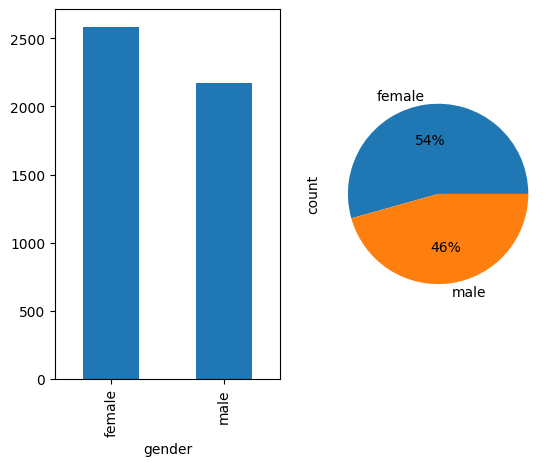

In [10]:
 distributuion_gender=df['gender'].value_counts()
fig,ax=plt.subplots(nrows=1,ncols=2)
 distributuion_gender.plot(kind='pie',ax=ax[1],autopct='%0.0f%%')
 distributuion_gender.plot(kind='bar',ax=ax[0])


In [11]:
# Extract width and height into separate columns
df[['width', 'height']] = pd.DataFrame(df['dimension'].tolist(), index=df.index)

# Now you can analyze them separately
print(df[['width', 'height']].describe())

             width       height
count  4757.000000  4757.000000
mean    155.224932   155.224932
std      72.009691    72.009691
min      24.000000    24.000000
25%      81.000000    81.000000
50%     122.000000   122.000000
75%     182.000000   182.000000
max     410.000000   410.000000


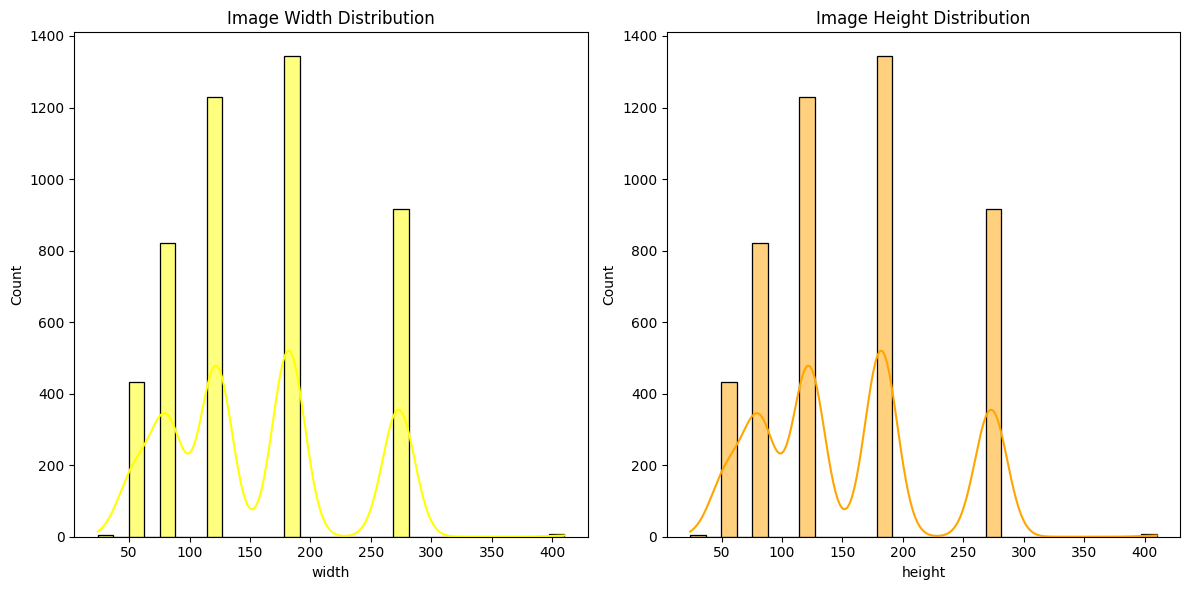

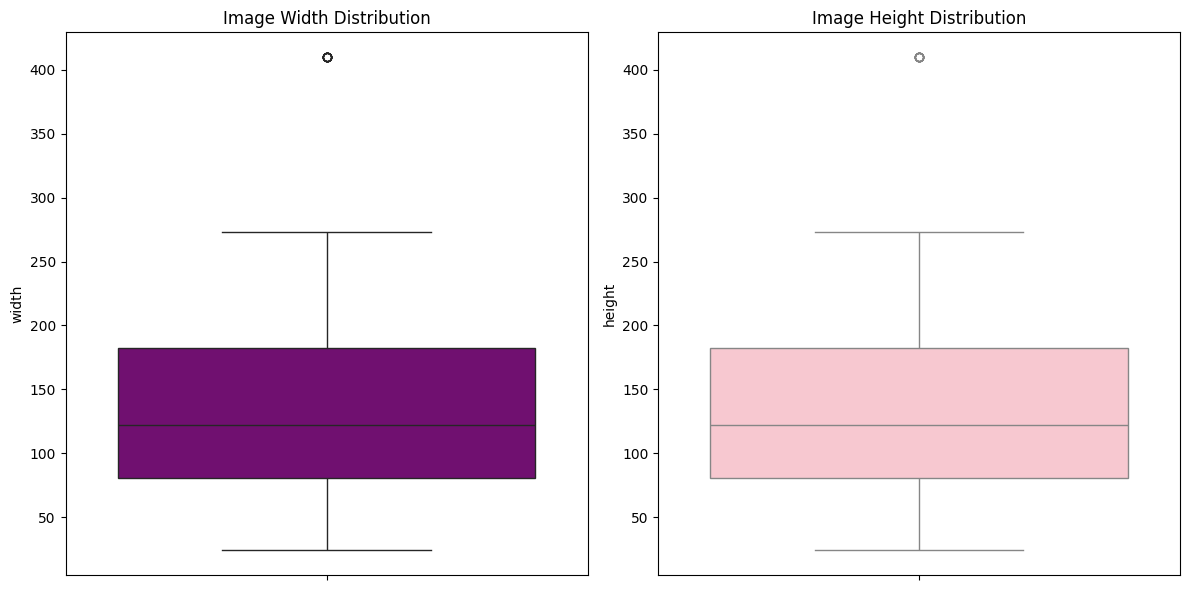

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='width', bins=30, kde=True,color='yellow')
plt.title('Image Width Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='height', bins=30, kde=True,color='orange')
plt.title('Image Height Distribution')
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='width',color='purple')
plt.title('Image Width Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='height',color='pink')
plt.title('Image Height Distribution')
plt.tight_layout()
plt.show()

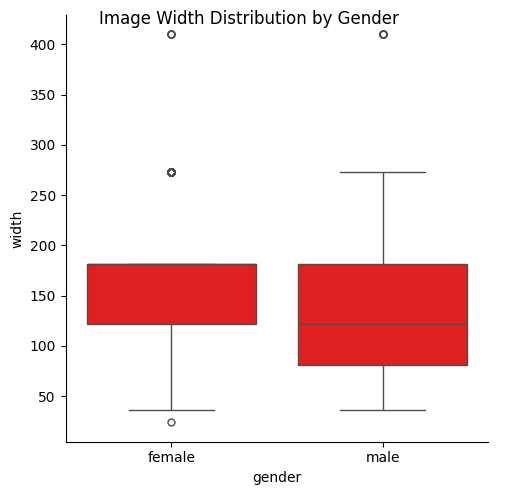

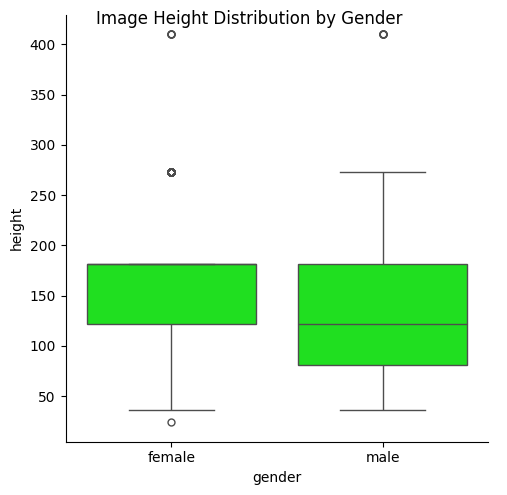

In [13]:

# Width by gender
g = sns.catplot(data=df, x='gender', y='width', kind='box',color='red')
g.fig.suptitle('Image Width Distribution by Gender')
plt.show()

# Height by gender
g = sns.catplot(data=df, x='gender', y='height', kind='box',color='lime')
g.fig.suptitle('Image Height Distribution by Gender')
plt.show()

In [14]:
#we have almost equal distribution of gender
#most of the images are having dimension more than 60
#females have most of femlae imgs are dimension is high compared to male

In [17]:
# Filter images where BOTH width and height > 60
df_filter = df[(df['width'] > 60) & (df['height'] > 60)]
df_filter.shape

(4319, 5)

In [18]:
df_filter['gender'].value_counts(normalize=True)

gender
female    0.552211
male      0.447789
Name: proportion, dtype: float64

In [27]:
import cv2
import pandas as pd
import numpy as np

def structuring(path):
    try:
        # Read image
        img = cv2.imread(path)
        if img is None:
            print(f"Could not read image: {path}")
            return None
            
        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Resize using appropriate interpolation
        interpolation = cv2.INTER_AREA if gray.shape[0] >= 100 else cv2.INTER_CUBIC
        gray_resize = cv2.resize(gray, (100, 100), interpolation)
        
        # Flatten and return
        return gray_resize.flatten()
    except Exception as e:
        print(f"Error processing {path}: {str(e)}")
        return None

# Apply the function and verify
df_filter = df_filter.copy()  # Create independent copy
df_filter['data'] = df_filter['filepath'].apply(structuring)

# Check results
print(f"Processed {len(df_filter)} images")
print(f"Successfully processed: {df_filter['data'].notnull().sum()}")
print("Sample processed data:", df_filter['data'].iloc[0][:10])  # First 10 values

Processed 4319 images
Successfully processed: 4319
Sample processed data: [200 189 188 181 184 185 179 176 189 180]


In [33]:
data=df_filter['data'].apply(pd.Series)
data.columns=[f"pixel_{i}" for i in data.columns]
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,200,189,188,181,184,185,179,176,189,180,...,109,106,108,111,113,115,120,117,118,122
1,31,25,35,25,31,29,30,31,34,34,...,45,27,22,30,22,35,20,35,65,19
2,49,49,35,34,42,40,35,39,71,62,...,210,230,231,237,238,230,220,212,210,208
3,137,128,114,96,96,95,93,114,150,163,...,66,53,68,67,74,92,97,103,102,96
4,234,236,231,231,231,185,142,111,52,45,...,241,240,236,237,239,237,237,242,241,241


In [35]:
#Normalization
data=data/255.0
data['gender']=df_filter['gender']
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.003076,0.002907,0.002891,0.002784,0.002830,0.002845,0.002753,0.002707,0.002907,0.002768,...,0.001630,0.001661,0.001707,0.001738,0.001769,0.001845,0.001799,0.001815,0.001876,female
1,0.000477,0.000384,0.000538,0.000384,0.000477,0.000446,0.000461,0.000477,0.000523,0.000523,...,0.000415,0.000338,0.000461,0.000338,0.000538,0.000308,0.000538,0.001000,0.000292,female
2,0.000754,0.000754,0.000538,0.000523,0.000646,0.000615,0.000538,0.000600,0.001092,0.000953,...,0.003537,0.003552,0.003645,0.003660,0.003537,0.003383,0.003260,0.003230,0.003199,female
3,0.002107,0.001968,0.001753,0.001476,0.001476,0.001461,0.001430,0.001753,0.002307,0.002507,...,0.000815,0.001046,0.001030,0.001138,0.001415,0.001492,0.001584,0.001569,0.001476,female
4,0.003599,0.003629,0.003552,0.003552,0.003552,0.002845,0.002184,0.001707,0.000800,0.000692,...,0.003691,0.003629,0.003645,0.003676,0.003645,0.003645,0.003722,0.003706,0.003706,female


In [37]:
data.isnull().sum() #calculate missing values 

pixel_0       0
pixel_1       0
pixel_2       0
pixel_3       0
pixel_4       0
             ..
pixel_9996    0
pixel_9997    0
pixel_9998    0
pixel_9999    0
gender        0
Length: 10001, dtype: int64

In [41]:
#save data
import pickle 
pickle.dump(data,open('./data_images_100_100.pickle',mode='wb'))